<a href="https://colab.research.google.com/github/mnslarcher/cs224w-slides-to-code/blob/main/05-label-propagation-for-node-classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> This is still **work in progress**

# Label Propagation for Node Classification

In [6]:
import random
from typing import Optional, Tuple

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [2]:
def seed_everything(seed: Optional[int] = None) -> None:
    random.seed(seed)
    np.random.seed(seed)


seed_everything(42)

# Probabilistic Relational Classifier

In [7]:
class ProbabilisticRelationalClassifier:
    def __init__(self, G: nx.Graph, threshold: float = 0.01, max_iter: int = 10, seed: Optional[int] = 42) -> None:
        self._G = G.copy()
        self.threshold = threshold
        self.max_iter = max_iter
        self.seed = seed

    def _iteration(self) -> None:
        for node in self._G.nodes(data=True):
            if node[1]["label"] is None:
                prob = np.mean([self._G.nodes[neighbor]["prob"] for neighbor in self._G.neighbors(node[0])])
                if abs(node[1]["prob"] - prob) < self.threshold:
                    node[1]["label"] = round(prob)

                node[1]["prob"] = prob

    def _is_converged(self) -> bool:
        return not any(label is None for _, label in nx.get_node_attributes(self._G, "label").items())

    def _draw(self, node_size, font_size) -> None:
        node_colors = [
            "tab:gray" if node[1]["label"] is None else "tab:blue" if node[1]["label"] else "tab:orange"
            for node in self._G.nodes(data=True)
        ]
        node_lables = {node[0]: f"{node[0]}\nP={node[1]['prob']:.2f}" for node in self._G.nodes(data=True)}
        pos = nx.spring_layout(self._G, seed=self.seed)
        nx.draw(self._G, pos=pos, node_color=node_colors, labels=node_lables, node_size=node_size, with_labels=True)

    def run(
        self,
        display: bool = True,
        node_size: int = 2500,
        draw_font_size: int = 10,
        title_font_size: int = 16,
        fig_size: Optional[Tuple[int, int]] = None,
    ) -> nx.Graph:
        num_iter = 0
        if display:
            plt.figure(figsize=fig_size)
            self._draw(node_size, draw_font_size)
            plt.title(f"Iteration: {num_iter}", fontsize=title_font_size, loc="left")
            plt.show()

        while not self._is_converged() and num_iter < self.max_iter:
            self._iteration()
            num_iter += 1
            if display:
                plt.figure(figsize=fig_size)
                self._draw(node_size, draw_font_size)
                plt.title(f"Iteration: {num_iter}", fontsize=title_font_size, loc="left")
                plt.show()

        return self._G

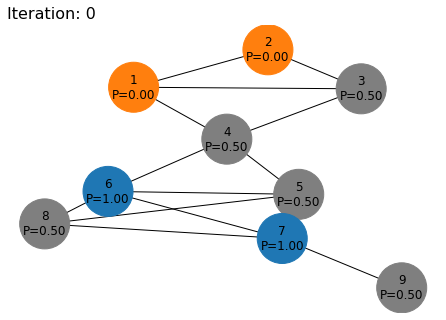

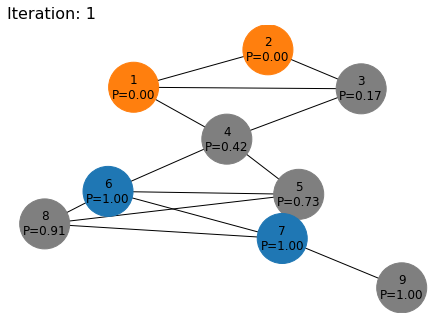

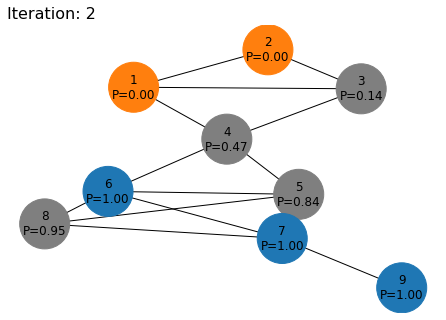

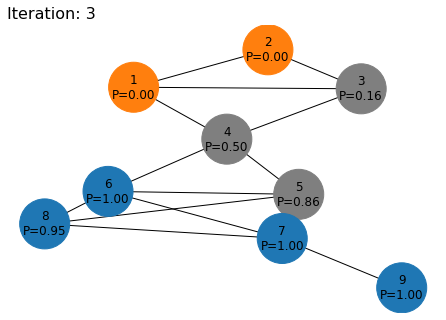

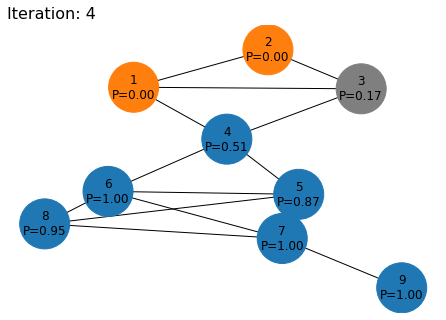

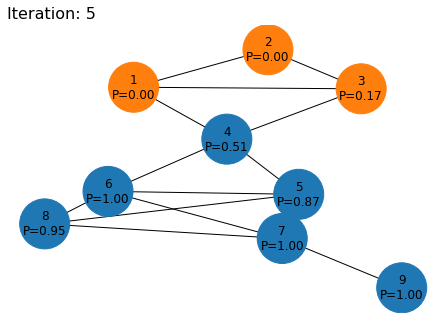

In [8]:
edge_list = [
    (1, 2),
    (1, 3),
    (1, 4),
    (2, 3),
    (3, 4),
    (4, 5),
    (4, 6),
    (5, 6),
    (5, 7),
    (5, 8),
    (6, 7),
    (6, 8),
    (7, 8),
    (7, 9),
]
G = nx.Graph(edge_list)
attrs = {
    1: {"prob": 0.0, "label": 0},
    2: {"prob": 0.0, "label": 0},
    3: {"prob": 0.5, "label": None},
    4: {"prob": 0.5, "label": None},
    5: {"prob": 0.5, "label": None},
    6: {"prob": 1.0, "label": 1},
    7: {"prob": 1.0, "label": 1},
    8: {"prob": 0.5, "label": None},
    9: {"prob": 0.5, "label": None},
}
nx.set_node_attributes(G, attrs)

clf = ProbabilisticRelationalClassifier(G)
_ = clf.run()